Created directory: figures for saving figures.

✅ Successfully loaded 1032 total queries from /content/batch_query_log.csv

--- Initial Data Head ---


,Timestamp,Query,Answer,Source_Metadata,Source_Content_Snippets,Status
0,2025-10-27 13:43:33,What is the primary difference between a hurri...,"The primary difference between a hurricane, a ...",C:\Users\himanshu pabbi\Documents\AI & ML Foun...,Source 1: Do you have information about Hurric...,Success
1,2025-10-27 13:43:34,Comment fonctionne un moteur à combustion inte...,"Je suis désolé, mais vous avez posé une questi...",C:\Users\himanshu pabbi\Documents\AI & ML Foun...,Source 1: Do you have information about E-Ciga...,Success
2,2025-10-27 13:43:35,¿Qué son las auroras boreales y dónde se ven t...,"Las auroras boreales, también conocidas como a...",C:\Users\himanshu pabbi\Documents\AI & ML Foun...,"Source 1: ""What are the symptoms of Heart-hand...",Success
3,2025-10-27 13:43:35,Wie funktioniert die Photosynthese in Pflanzen...,"Ich muss Ihnen leider sagen, dass die Frage ni...",C:\Users\himanshu pabbi\Documents\AI & ML Foun...,Source 1: Photodynamic therapy Photodynam...,Success
4,2025-10-27 13:43:36,What is the primary function of the mitochondr...,The primary function of the mitochondria in a ...,C:\Users\himanshu pabbi\Documents\AI & ML Foun...,"Source 1: ""What are the genetic changes relate...",Success




SECTION 2: Status Analysis (Robustness)

--- Table 1: Query Status Distribution ---


,Count,Percentage
Status,,
Success,991,96.03
Error,41,3.97


Saved figure to: figures/Figure_1_System_Robustness.png


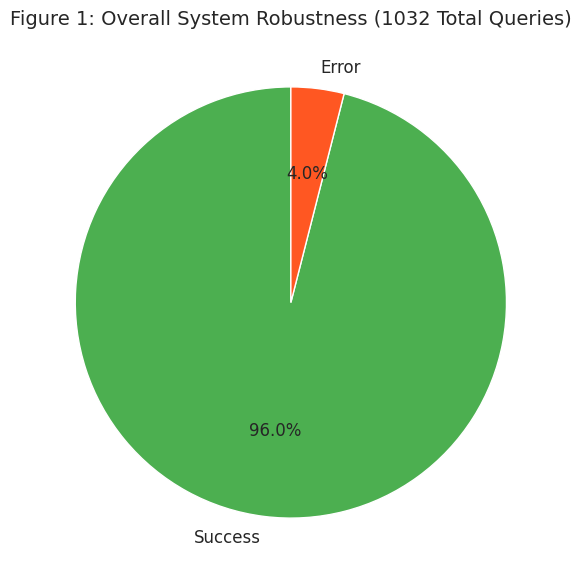



SECTION 3: Domain Relevance Analysis

--- Table 2: Domain Relevance Distribution ---


,Count,Percentage
Domain_Group,,
General/Other (Out-of-Domain),885,85.76
Healthcare (In-Domain),147,14.24


/tmp/ipython-input-1918178705.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=domain_counts.index, y=domain_counts.values, palette=['#FF9800', '#2196F3'])


Saved figure to: figures/Figure_2_Domain_Distribution.png


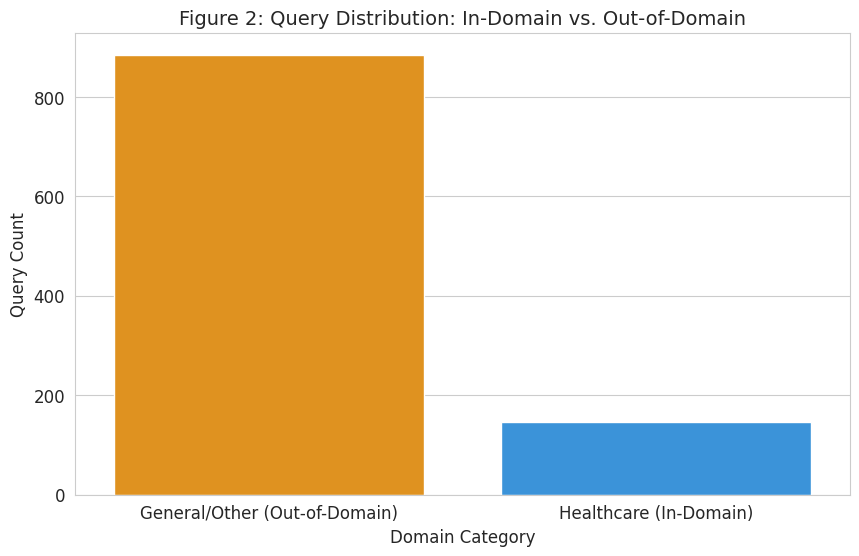



SECTION 4: Multilingual Distribution and Performance

--- Table 3: Multilingual Distribution ---


,Count,Percentage
Language_Group,,
English,379,36.72
French,325,31.49
Spanish,179,17.34
Portuguese,142,13.76
Other Non-English,7,0.68


/tmp/ipython-input-1918178705.py:163: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lang_counts.index, y=lang_counts.values, palette="Set2", order=lang_counts.index)


Saved figure to: figures/Figure_3_Multilingual_Distribution.png


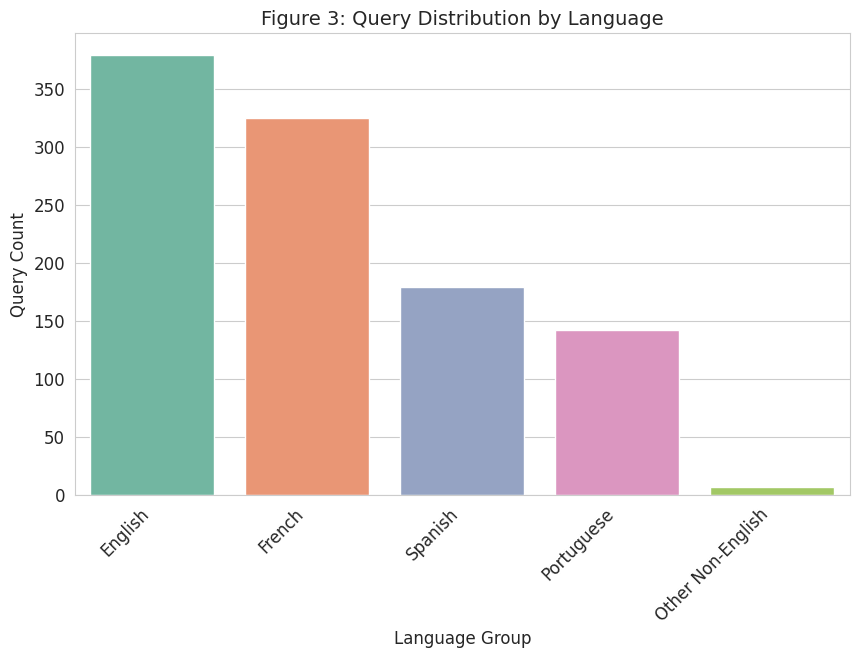


--- Table 4: Success Rate by Language Group ---


,Success Rate (%)
Language_Group,
Other Non-English,100.00
French,98.15
Spanish,95.53
Portuguese,95.07
English,94.72


/tmp/ipython-input-1918178705.py:186: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=success_rate_df.index, y='Success Rate (%)', data=success_rate_df, palette="viridis")


Saved figure to: figures/Figure_4_Success_Rate_by_Language.png


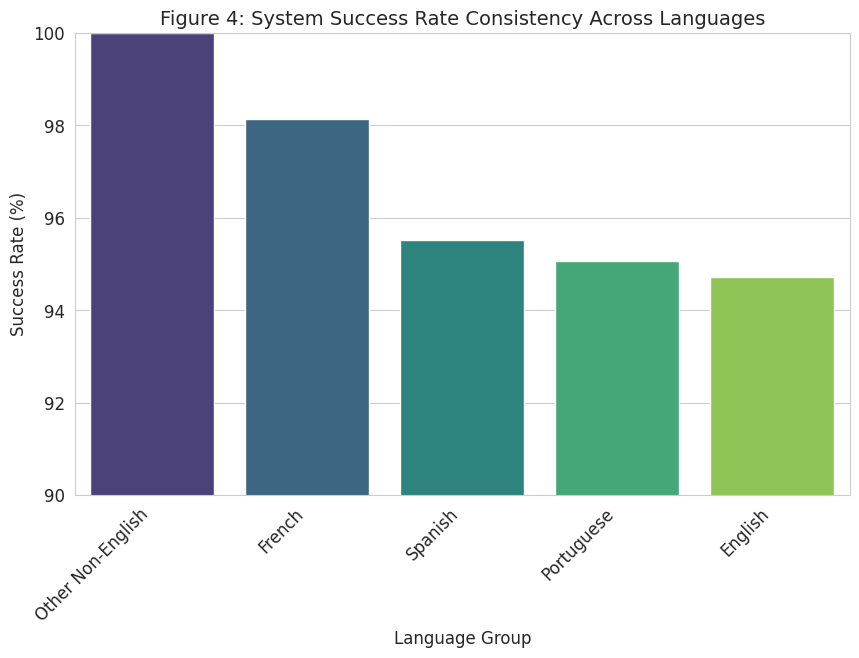

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import os # Import the os module for directory handling

# --- Configuration for Plotting and Saving ---
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# Define the directory for saving figures
FIGURES_DIR = 'figures'

# Ensure the figures directory exists
if not os.path.exists(FIGURES_DIR):
    os.makedirs(FIGURES_DIR)
    print(f"Created directory: {FIGURES_DIR} for saving figures.")
else:
    print(f"Figures will be saved to the existing directory: {FIGURES_DIR}")

# ====================================================================
# SECTION 1: Data Loading and Initial Inspection
# ====================================================================

FILE_PATH = '/content/batch_query_log.csv'

try:
    df = pd.read_csv(FILE_PATH)
    # Clean column names by stripping whitespace
    df.columns = df.columns.str.strip()
    print(f"\n✅ Successfully loaded {len(df)} total queries from {FILE_PATH}")
except FileNotFoundError:
    print(f"❌ Error: The file '{FILE_PATH}' was not found. Please check the path.")
    exit()

# Ensure the 'Query' column is string type for analysis
df['Query'] = df['Query'].astype(str).str.strip()

print("\n--- Initial Data Head ---")
display(df.head())

# ====================================================================
# SECTION 2: Status Analysis (System Robustness)
# ====================================================================

print("\n\n====================================================================")
print("SECTION 2: Status Analysis (Robustness)")
print("====================================================================")

status_counts = df['Status'].value_counts()
status_percentage = df['Status'].value_counts(normalize=True) * 100

print("\n--- Table 1: Query Status Distribution ---")
status_df = pd.DataFrame({
    'Count': status_counts,
    'Percentage': status_percentage.round(2)
})
display(status_df)

# --- Figure 1: Pie Chart Visualization ---
plt.figure(figsize=(7, 7))
colors = ['#4CAF50', '#FF5722', '#2196F3']
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=colors[:len(status_counts)])
plt.title(f'Figure 1: Overall System Robustness ({len(df)} Total Queries)', fontsize=14)

# Save the figure
fig1_path = os.path.join(FIGURES_DIR, 'Figure_1_System_Robustness.png')
plt.savefig(fig1_path, dpi=300)
print(f"Saved figure to: {fig1_path}")
plt.show()

# ====================================================================
# SECTION 3: Domain Relevance Analysis (In-Domain vs. Out-of-Domain)
# ====================================================================

print("\n\n====================================================================")
print("SECTION 3: Domain Relevance Analysis")
print("====================================================================")

# Heuristic: Define keywords based on the 'healthcare_data.txt' knowledge base content
healthcare_keywords = [
    'chemotherapy', 'diabetes', 'CFS', 'syndrome', 'disease', 'cancer', 'tumor',
    'medical', 'tracheostomy', 'ventilator', 'oxygen', 'clot', 'pulmonary',
    'diagnóstico', 'terapia', 'sintomas', 'doença', 'saúde', 'cuidados', 'hospital', 'cirurgia'
]

# Create a boolean column based on keyword presence
df['Is_Healthcare'] = df['Query'].str.contains('|'.join(healthcare_keywords), case=False, na=False)

# Map boolean to category labels
df['Domain_Group'] = df['Is_Healthcare'].map({
    True: 'Healthcare (In-Domain)',
    False: 'General/Other (Out-of-Domain)'
})

domain_counts = df['Domain_Group'].value_counts()
domain_percentage = df['Domain_Group'].value_counts(normalize=True) * 100

print("\n--- Table 2: Domain Relevance Distribution ---")
domain_df = pd.DataFrame({
    'Count': domain_counts,
    'Percentage': domain_percentage.round(2)
})
display(domain_df)

# --- Figure 2: Bar Plot Visualization ---
plt.figure(figsize=(10, 6))
sns.barplot(x=domain_counts.index, y=domain_counts.values, palette=['#FF9800', '#2196F3'])
plt.title('Figure 2: Query Distribution: In-Domain vs. Out-of-Domain', fontsize=14)
plt.ylabel('Query Count')
plt.xlabel('Domain Category')
plt.xticks(rotation=0)

# Save the figure
fig2_path = os.path.join(FIGURES_DIR, 'Figure_2_Domain_Distribution.png')
plt.savefig(fig2_path, dpi=300)
print(f"Saved figure to: {fig2_path}")
plt.show()

# ====================================================================
# SECTION 4: Multilingual Distribution Analysis
# ====================================================================

print("\n\n====================================================================")
print("SECTION 4: Multilingual Distribution and Performance")
print("====================================================================")

# Heuristics based on common language markers
keywords = {
    'French': [' le ', ' la ', ' les ', ' un ', ' une ', 'de ', 'des ', 'Comment fonctionne', 'Quelle est '],
    'Spanish': [' el ', ' la ', ' los ', ' las ', ' un ', ' una ', 'es ', 'son ', 'que ', 'Cómo ', '¿'],
    'Portuguese': [' o ', ' a ', ' os ', ' as ', ' um ', ' uma ', 'é ', 'são ', 'Qual é '],
    'Other Non-English': ['Wie funktioniert', 'Was ist', '的', '是', '¿'] # Covers German, Chinese and other non-English markers
}

def detect_language(query):
    query_lower = str(query).lower()

    # Check for specific languages
    if any(k in query_lower for k in keywords['French']): return 'French'
    if any(k in query_lower for k in keywords['Spanish']): return 'Spanish'
    if any(k in query_lower for k in keywords['Portuguese']): return 'Portuguese'
    if any(k in query_lower for k in keywords['Other Non-English']): return 'Other Non-English'

    # Default to English
    return 'English'

df['Language_Group'] = df['Query'].apply(detect_language)

lang_counts = df['Language_Group'].value_counts()
lang_percentage = df['Language_Group'].value_counts(normalize=True) * 100

print("\n--- Table 3: Multilingual Distribution ---")
lang_df = pd.DataFrame({
    'Count': lang_counts,
    'Percentage': lang_percentage.round(2)
}).sort_values(by='Count', ascending=False)
display(lang_df)

# --- Figure 3: Multilingual Distribution Visualization ---
plt.figure(figsize=(10, 6))
sns.barplot(x=lang_counts.index, y=lang_counts.values, palette="Set2", order=lang_counts.index)
plt.title('Figure 3: Query Distribution by Language', fontsize=14)
plt.ylabel('Query Count')
plt.xlabel('Language Group')
plt.xticks(rotation=45, ha='right')

# Save the figure
fig3_path = os.path.join(FIGURES_DIR, 'Figure_3_Multilingual_Distribution.png')
plt.savefig(fig3_path, dpi=300)
print(f"Saved figure to: {fig3_path}")
plt.show()

# --- Cross-Analysis: Success Rate by Language ---
success_rate_lang = df.groupby('Language_Group')['Status'].apply(
    lambda x: (x == 'Success').sum() / len(x) * 100
).sort_values(ascending=False)

print("\n--- Table 4: Success Rate by Language Group ---")
success_rate_df = success_rate_lang.to_frame(name='Success Rate (%)').round(2)
display(success_rate_df)

# --- Figure 4: Success Rate by Language Visualization ---
plt.figure(figsize=(10, 6))
sns.barplot(x=success_rate_df.index, y='Success Rate (%)', data=success_rate_df, palette="viridis")
plt.title('Figure 4: System Success Rate Consistency Across Languages', fontsize=14)
plt.ylabel('Success Rate (%)')
plt.xlabel('Language Group')
plt.ylim(90, 100) # Zoom in to highlight small differences
plt.xticks(rotation=45, ha='right')

# Save the figure
fig4_path = os.path.join(FIGURES_DIR, 'Figure_4_Success_Rate_by_Language.png')
plt.savefig(fig4_path, dpi=300)
print(f"Saved figure to: {fig4_path}")
plt.show()